### Import necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os
import pydicom
import cv2
import nibabel as nib

### Show an image from the upper respiratory tract data

Image dimensions: (512, 512, 58)


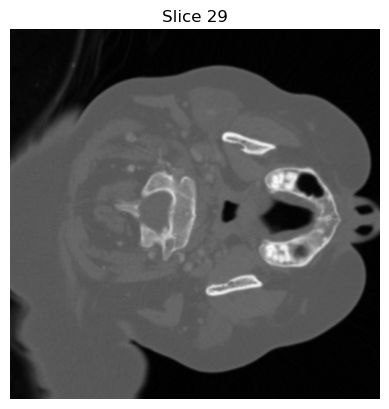

In [2]:
# Path to the NIfTI file
file_path = r'../Khoss_Daten_for_Rawan/thesis/dataset/recs_raw/rec_1/8.nii.gz'

# Load the NIfTI file
nifti_img = nib.load(file_path)

# Extract image data as a NumPy array
img_data = nifti_img.get_fdata()

# Display information about the file
print(f"Image dimensions: {img_data.shape}")

# Display a middle slice (e.g., along the z-axis)
slice_index = img_data.shape[2] // 2  # Middle slice
plt.imshow(img_data[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')
plt.show()


### Show the slices of the above image

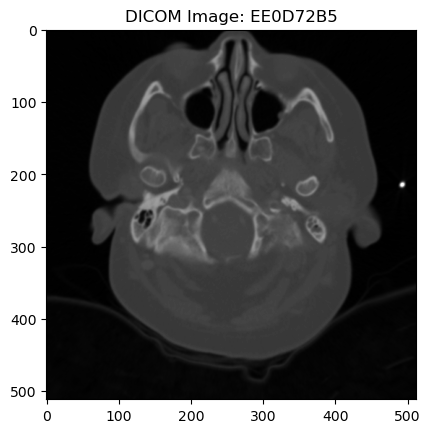

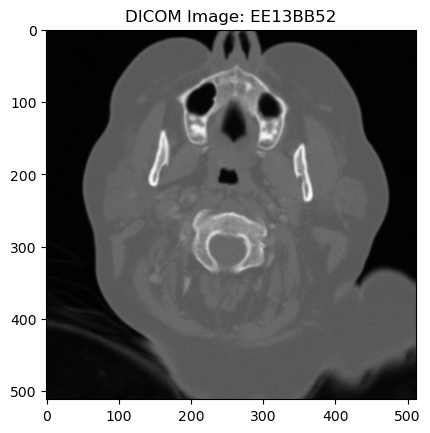

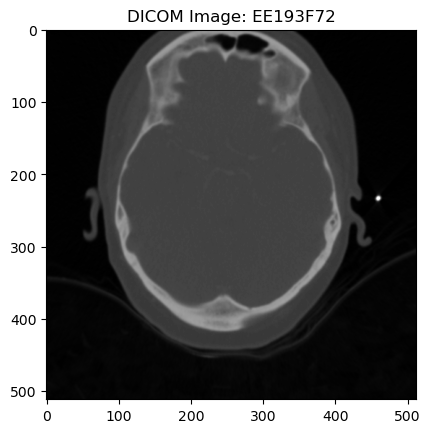

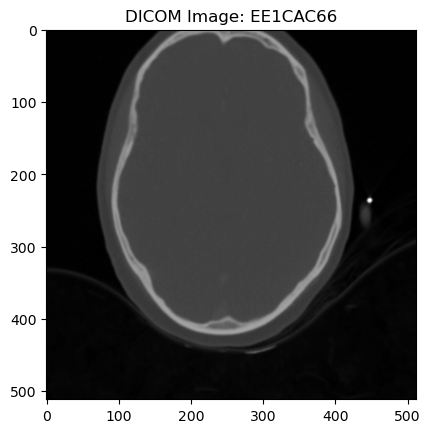

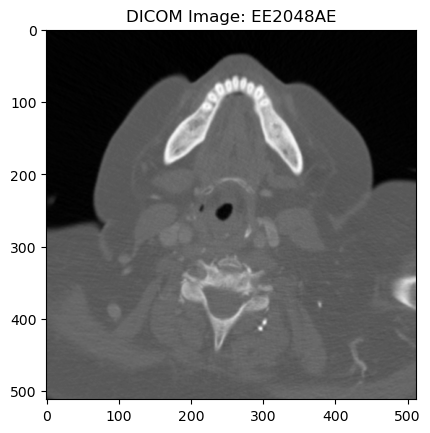

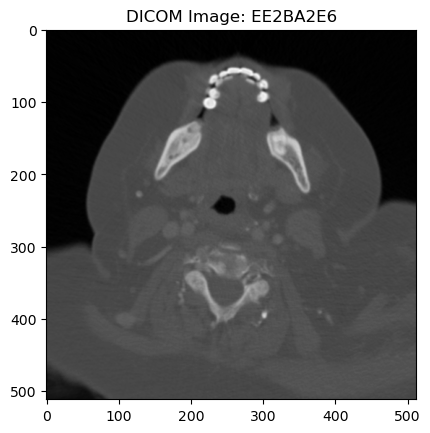

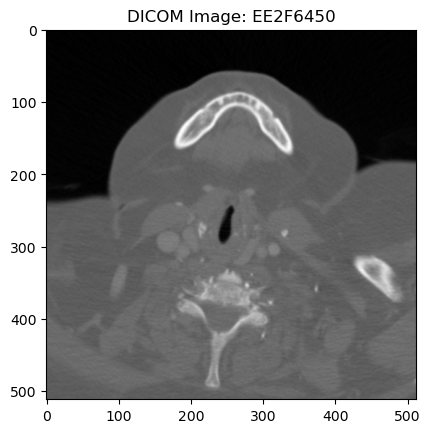

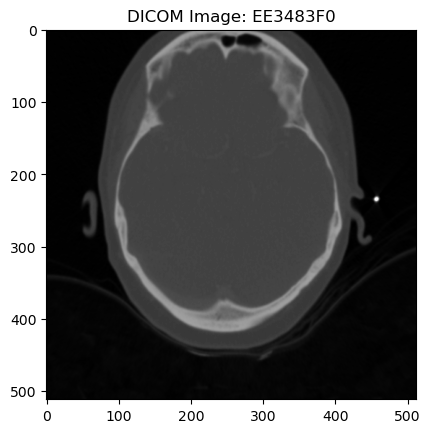

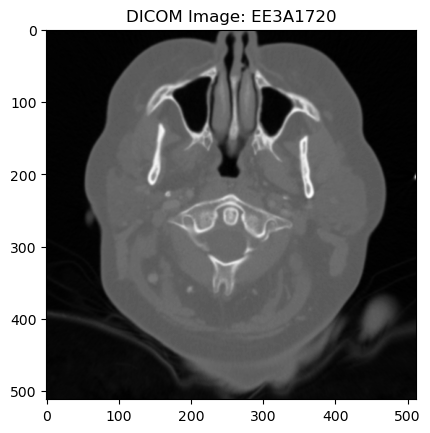

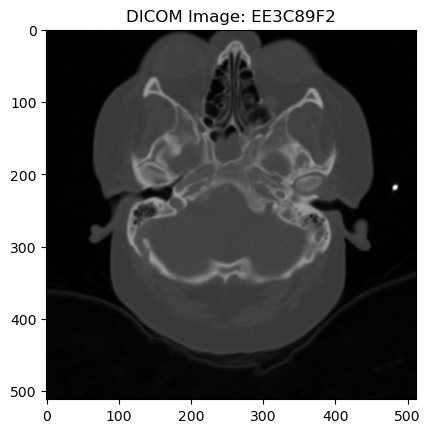

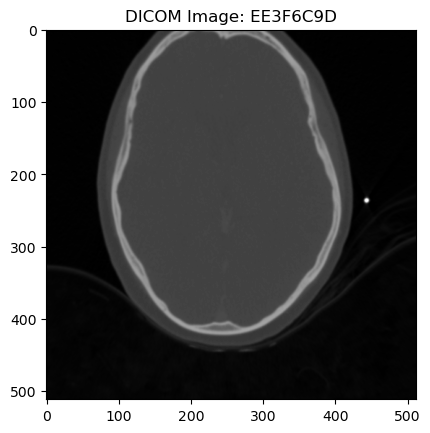

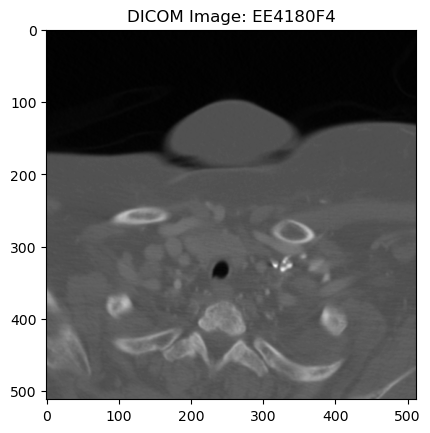

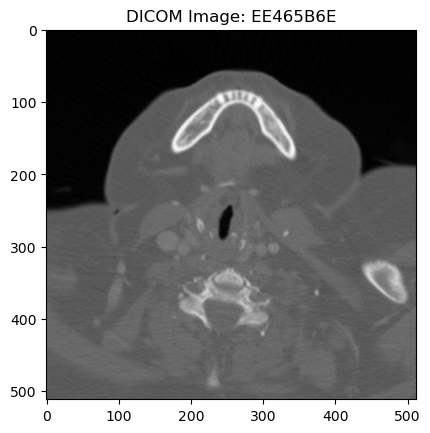

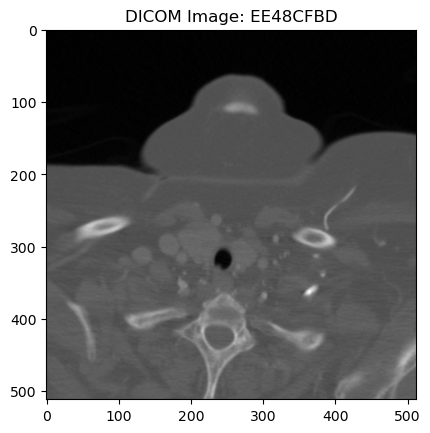

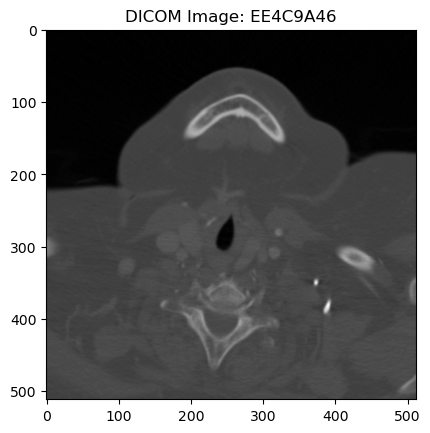

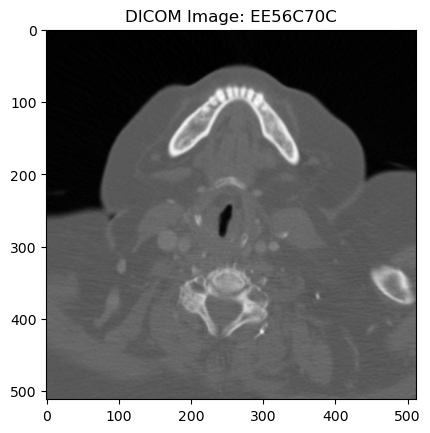

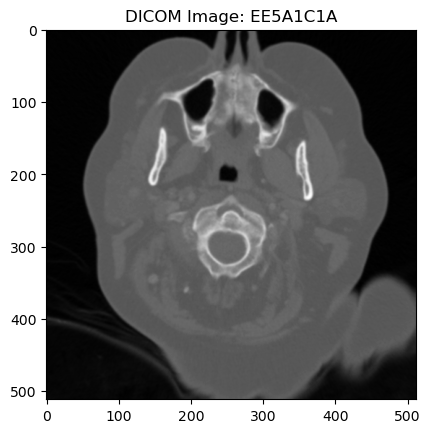

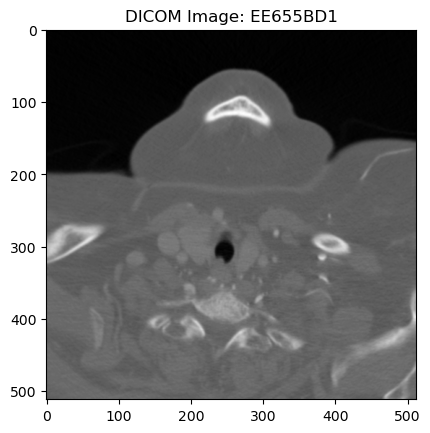

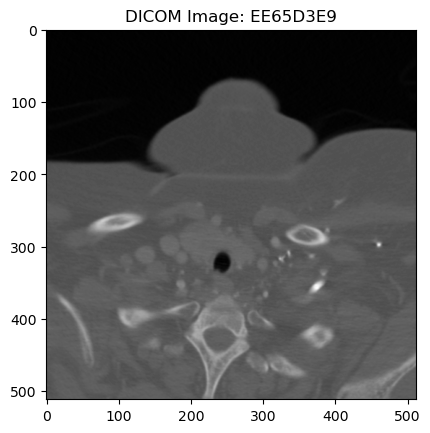

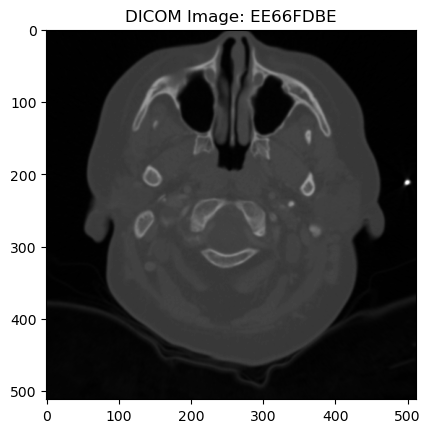

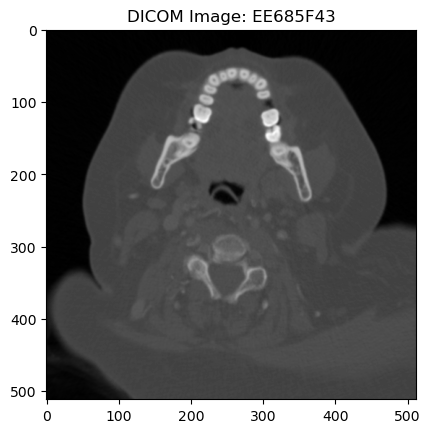

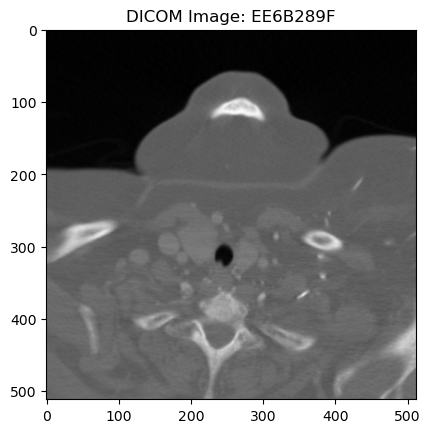

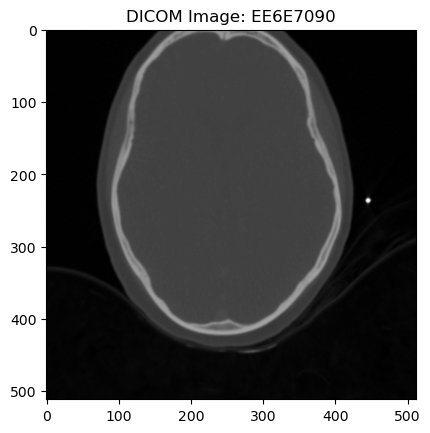

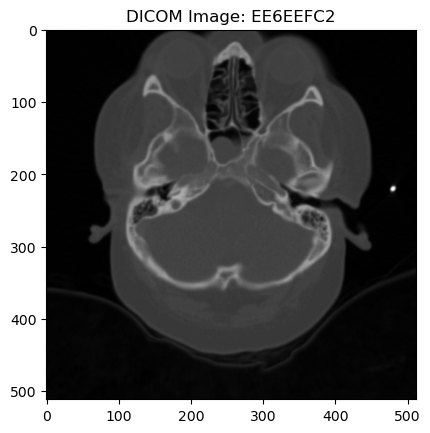

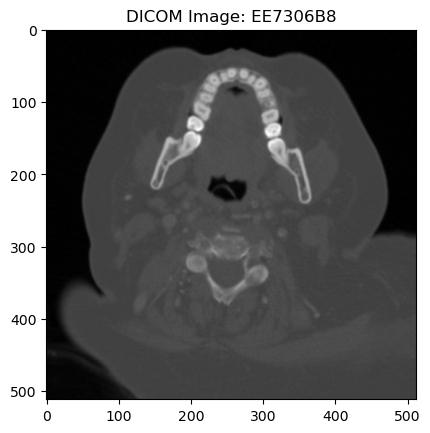

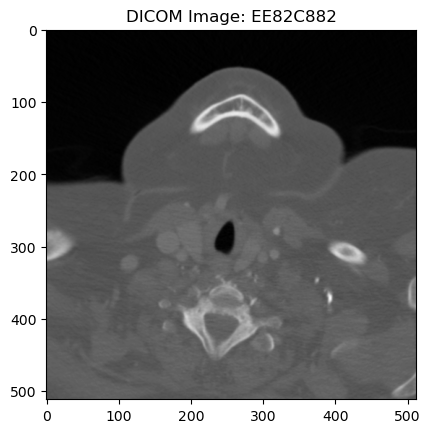

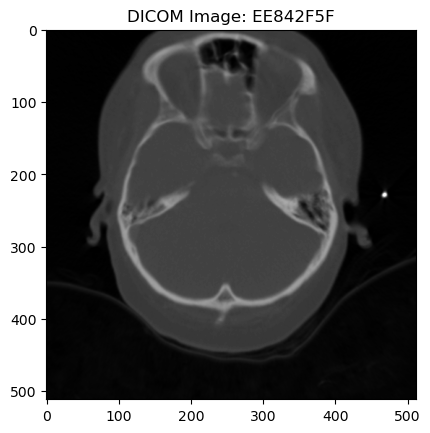

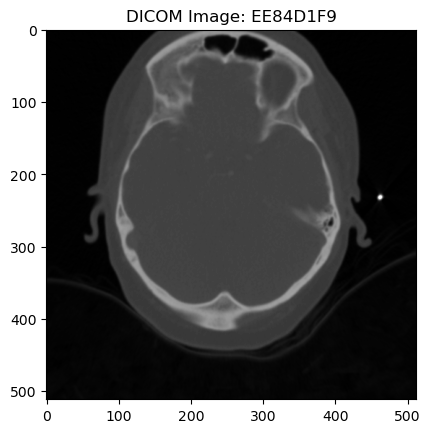

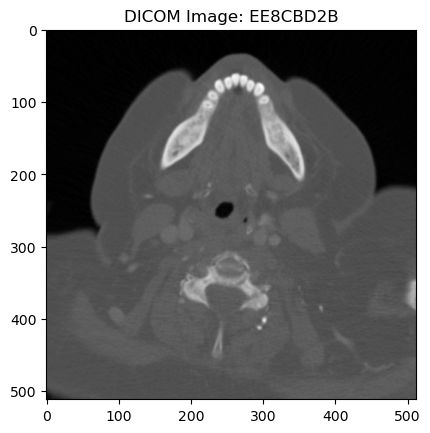

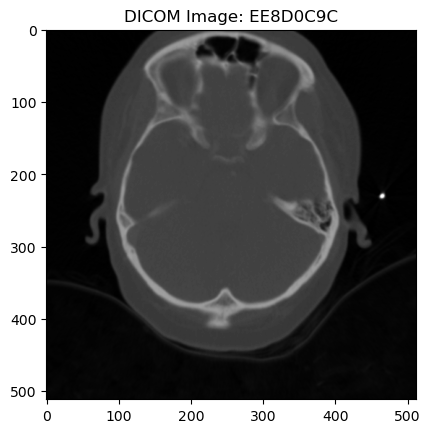

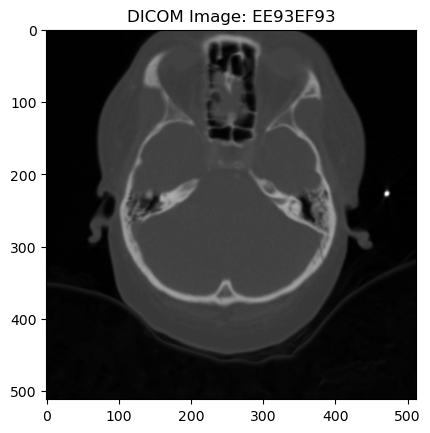

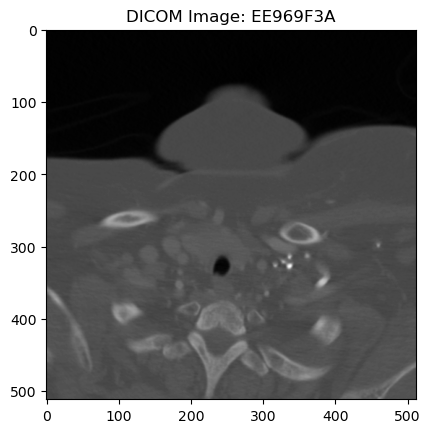

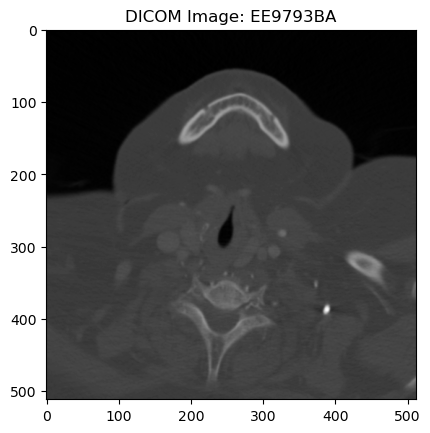

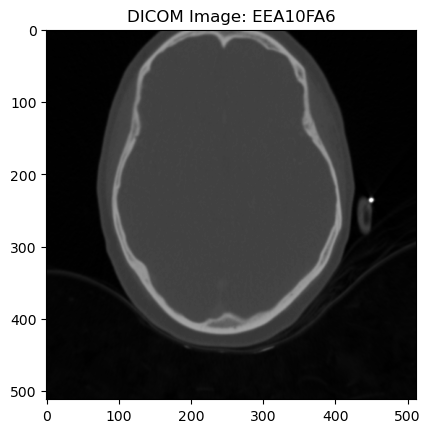

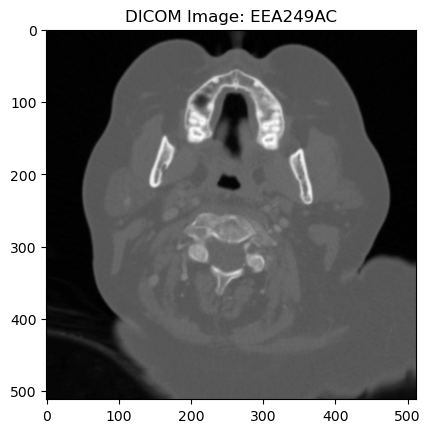

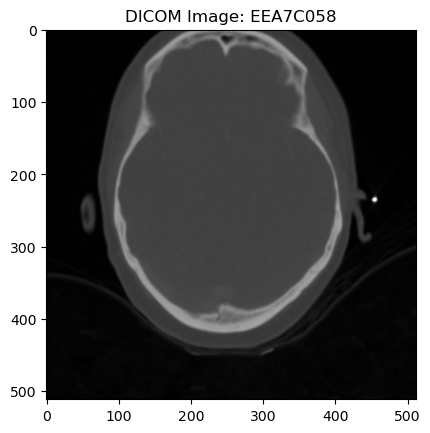

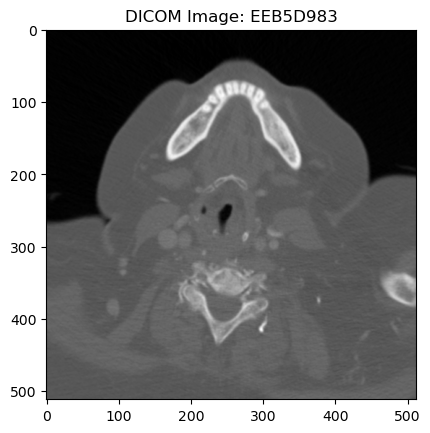

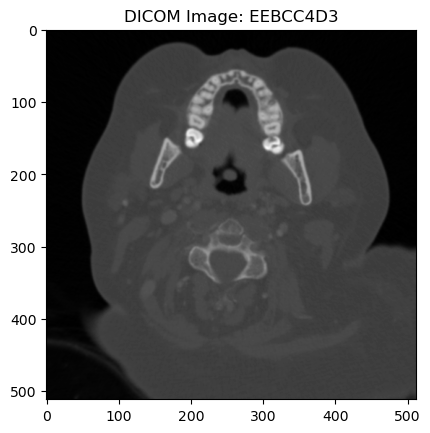

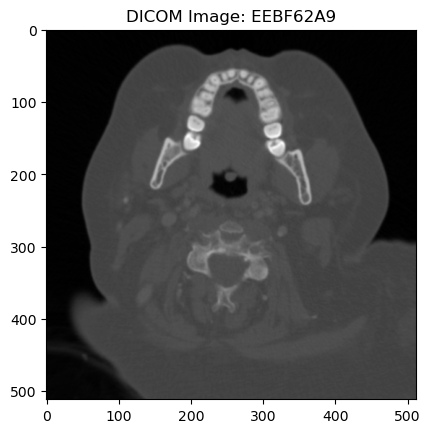

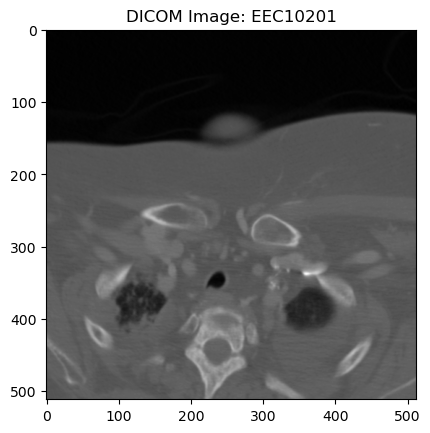

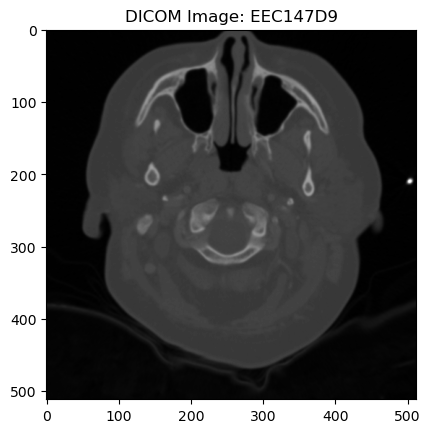

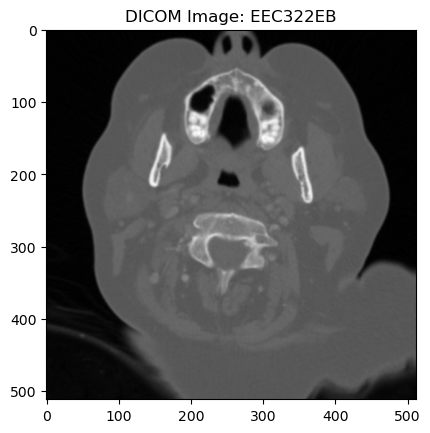

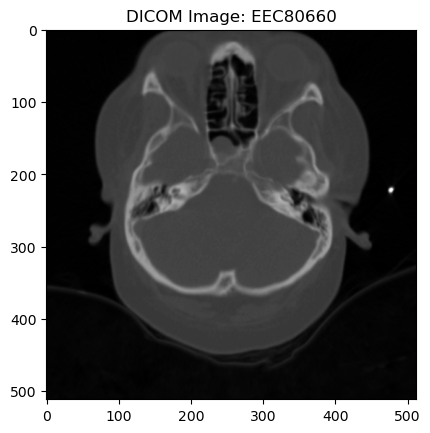

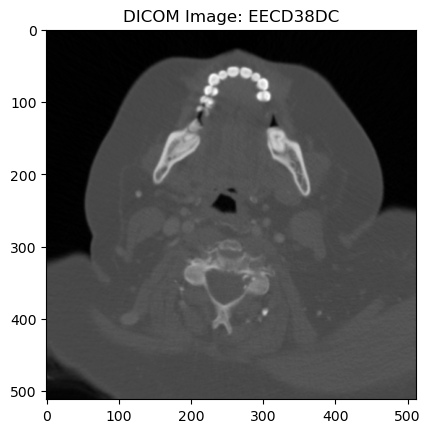

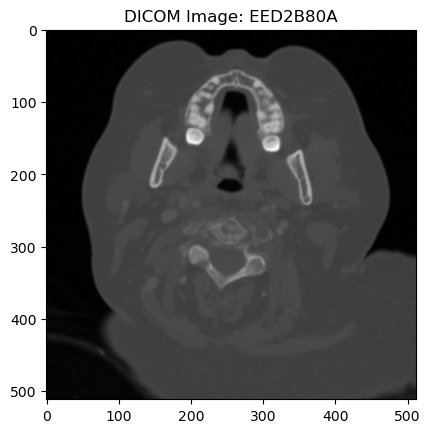

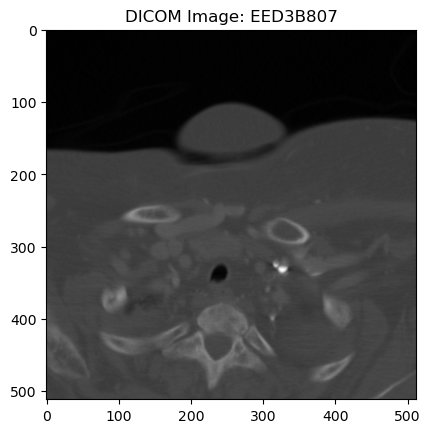

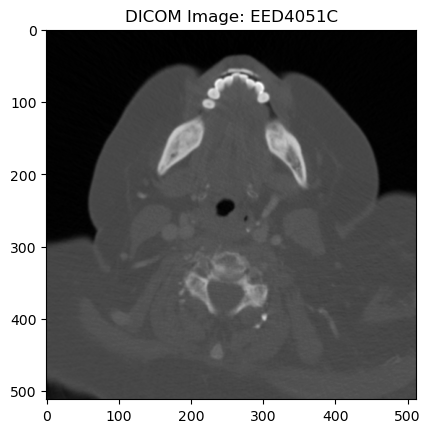

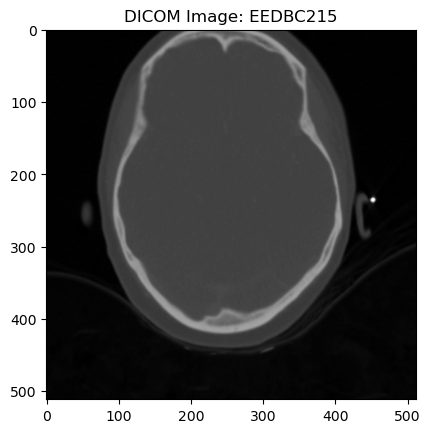

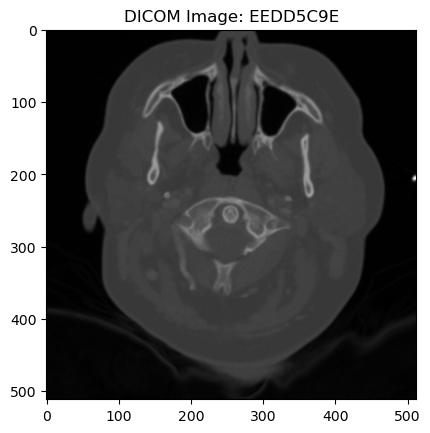

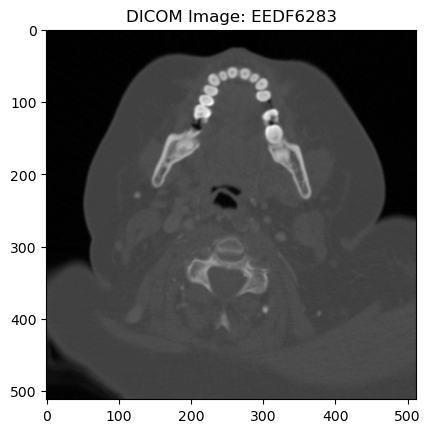

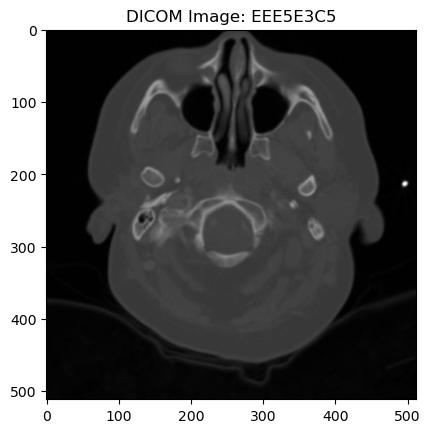

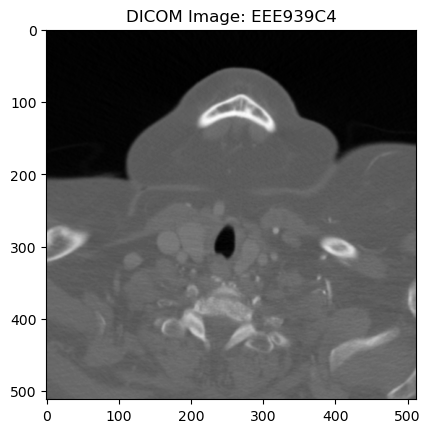

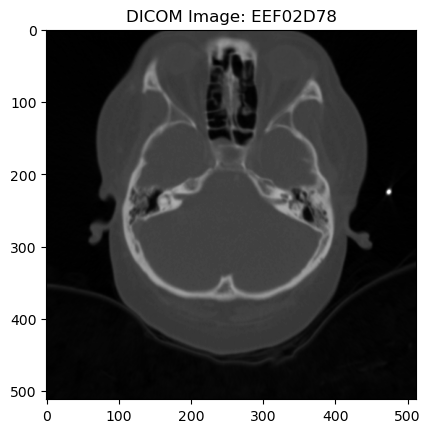

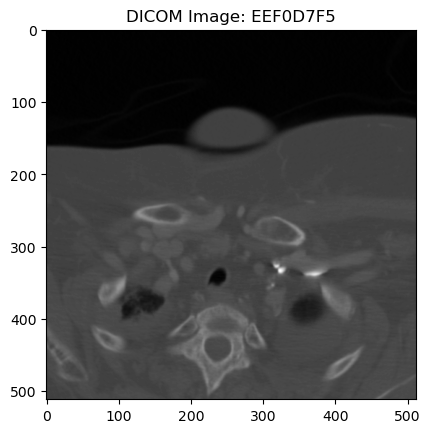

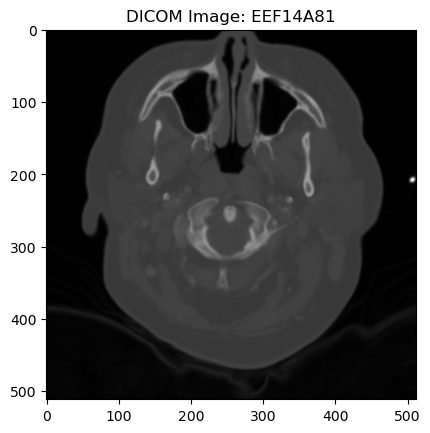

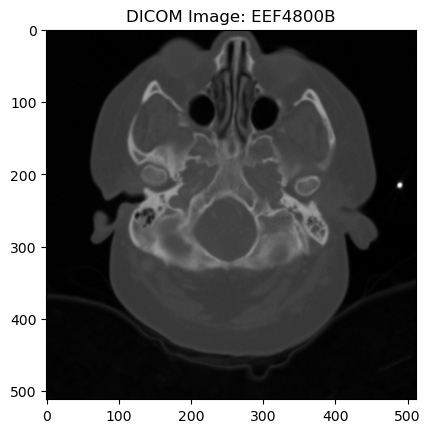

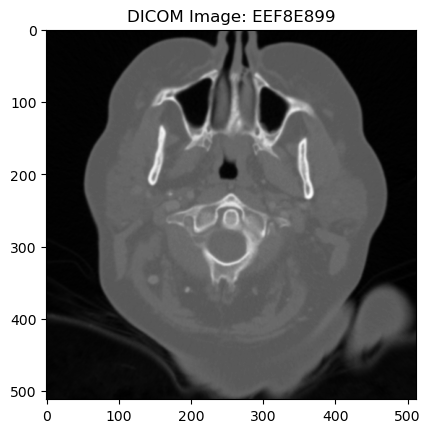

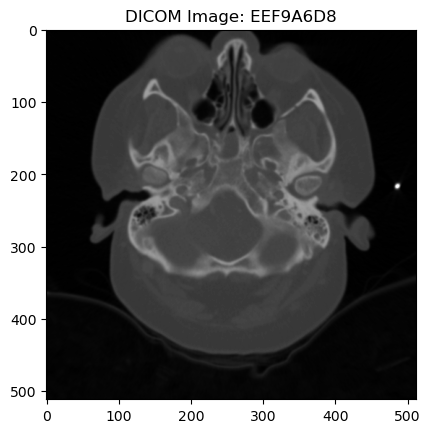

Number of images: 58


In [3]:
# Directory containing the DICOM files
directory = '../Khoss_Daten_for_Rawan/thesis/dataset/recs_raw/rec_1'

# Counter for the number of images
image_count = 0

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".dcm") or filename.startswith("EE"):  # Check if it's a DICOM file (based on naming convention)
        dicom_file = os.path.join(directory, filename)
        
        # Load the DICOM file
        ds = pydicom.dcmread(dicom_file)
        
        # Display the image data
        plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
        plt.title(f'DICOM Image: {filename}')
        plt.show()
        
        # Increment the image counter
        image_count += 1

# Print the total number of images at the end
print(f"Number of images: {image_count}")


### Show the labeled data 

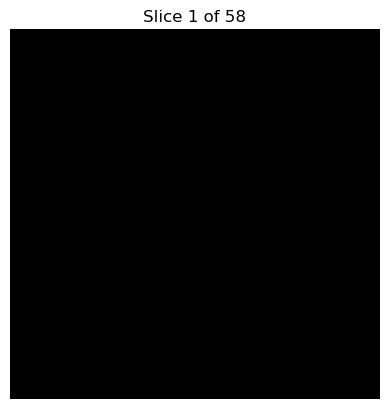

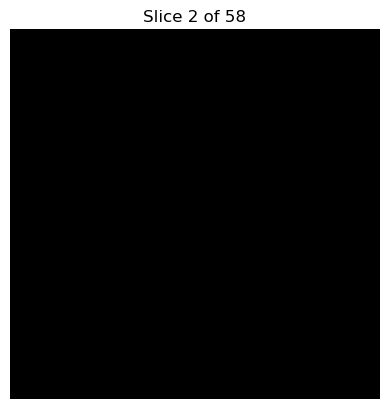

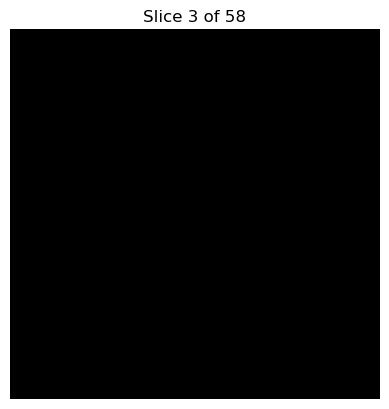

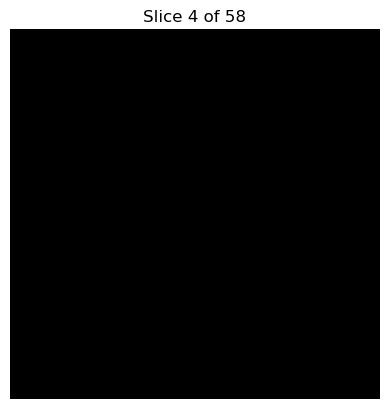

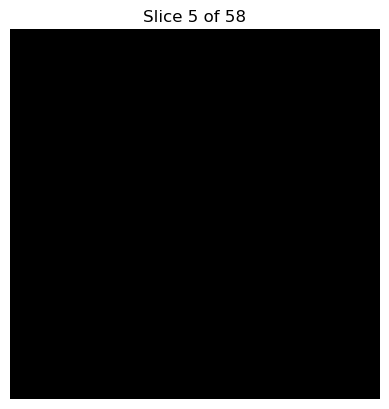

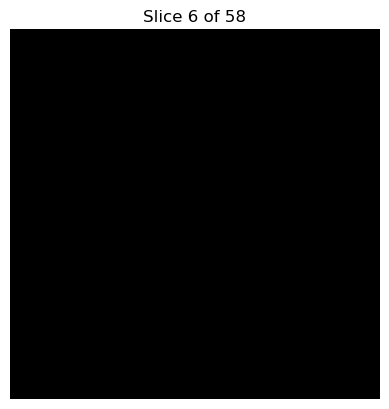

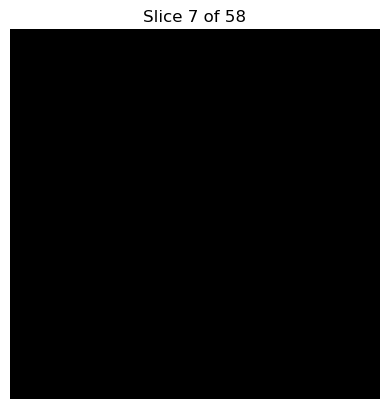

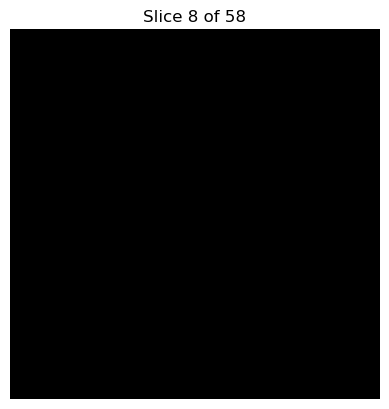

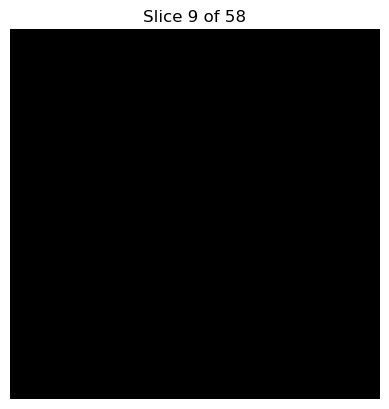

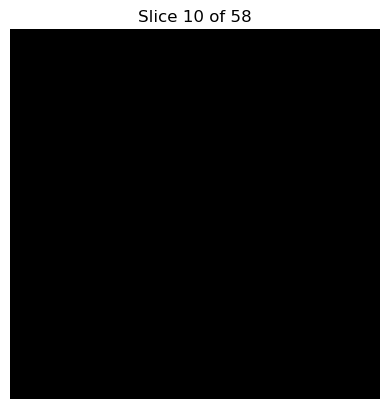

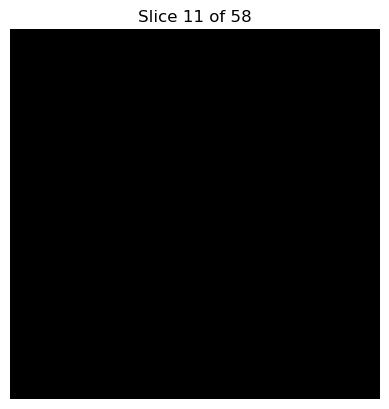

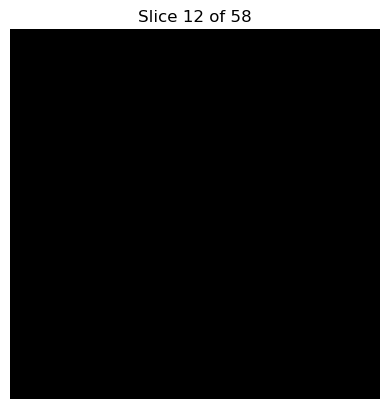

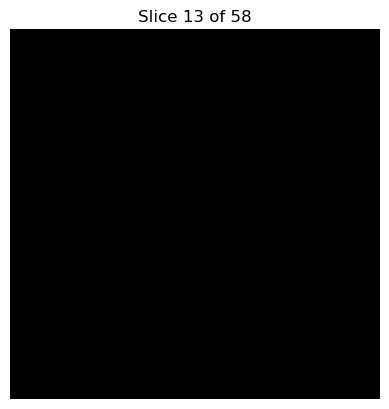

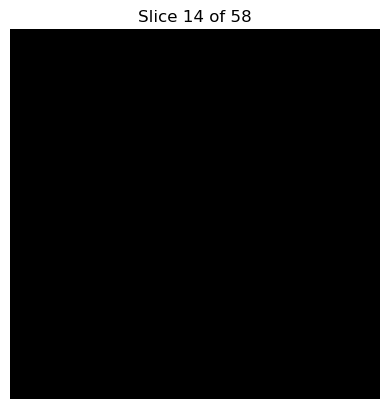

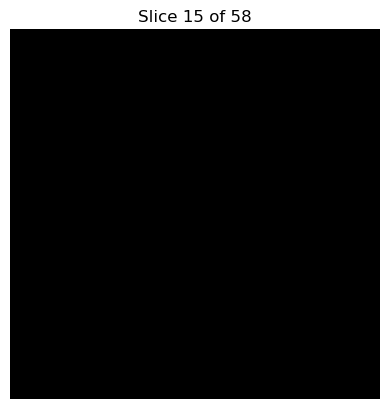

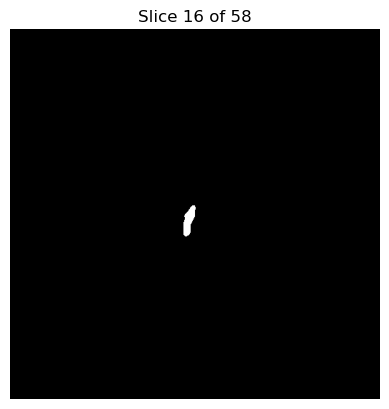

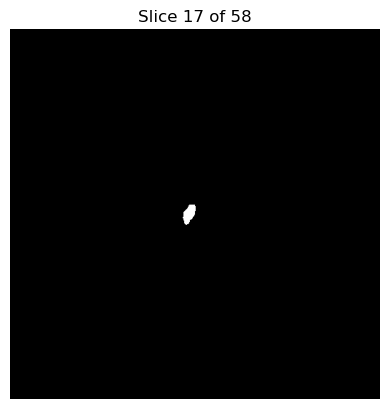

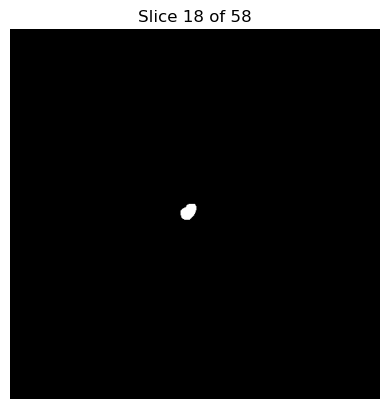

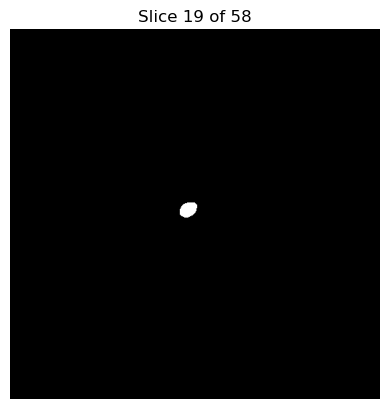

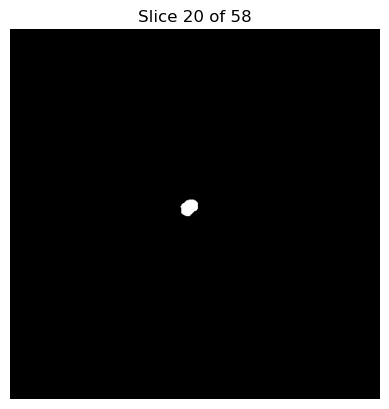

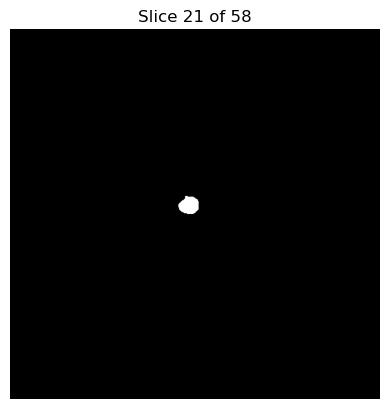

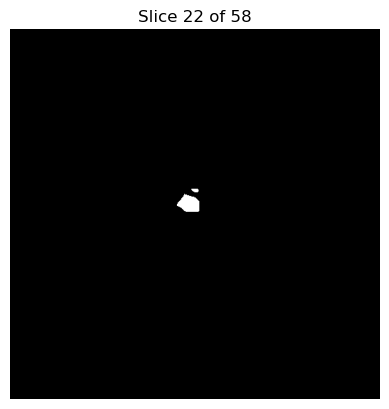

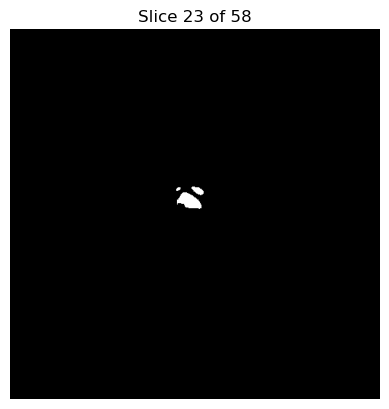

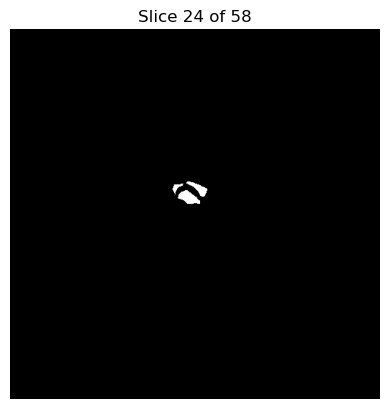

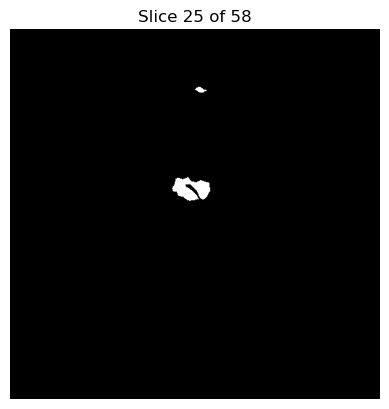

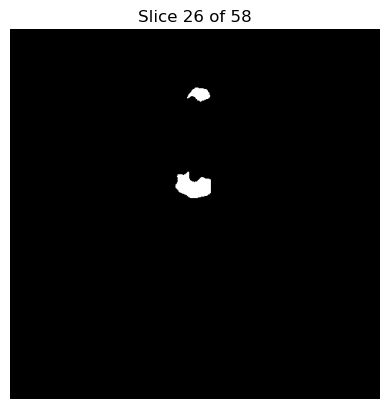

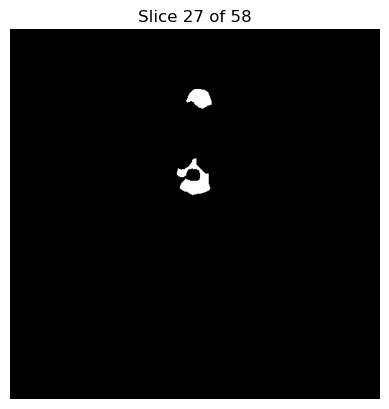

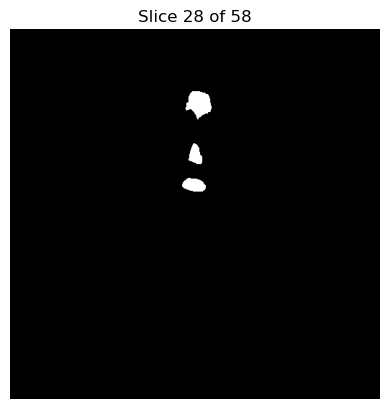

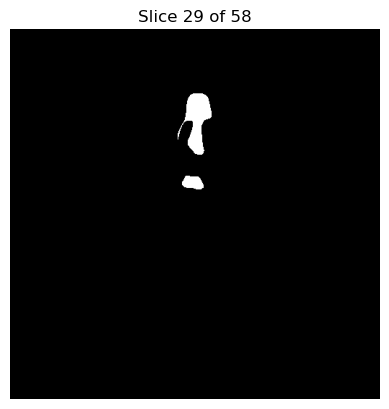

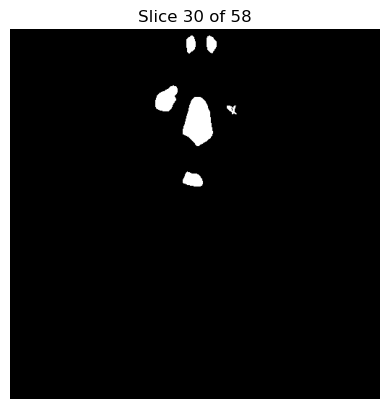

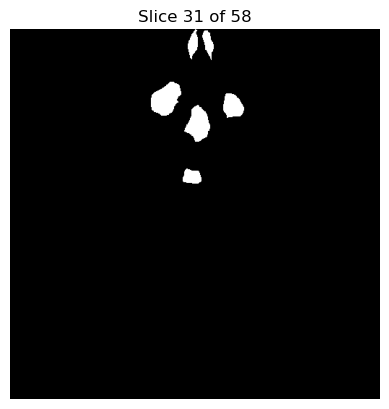

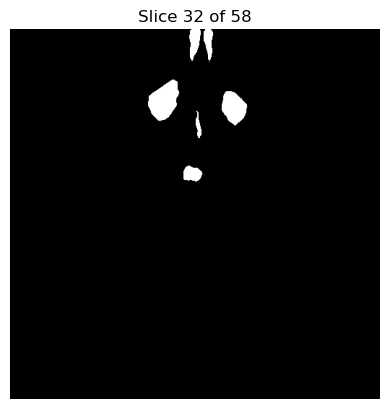

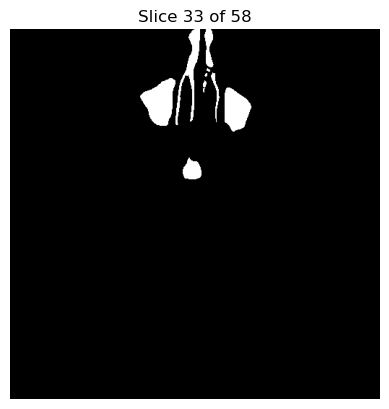

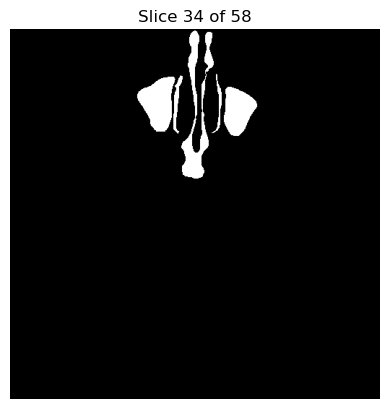

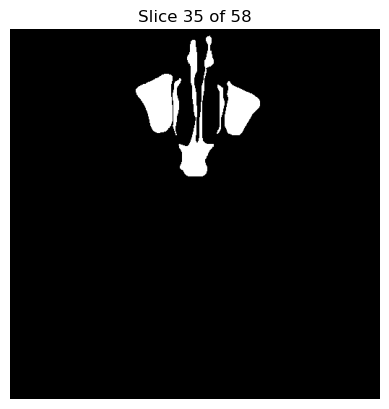

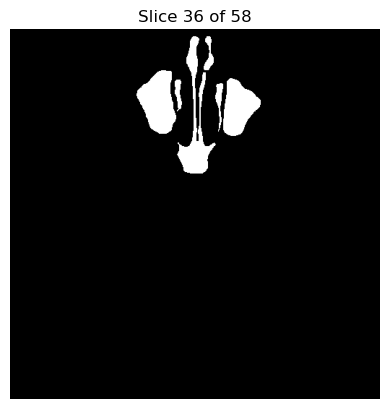

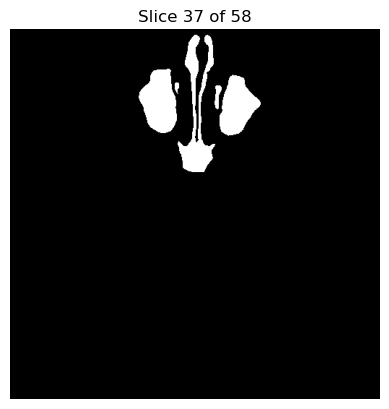

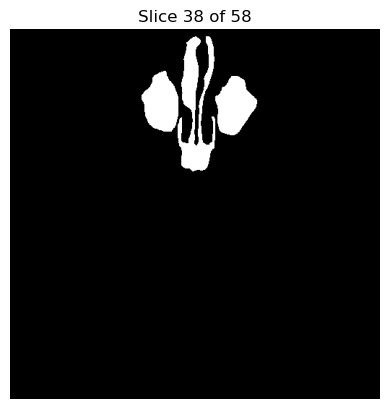

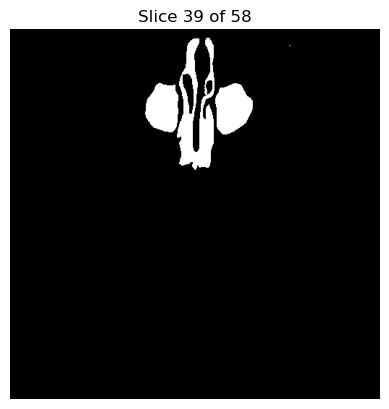

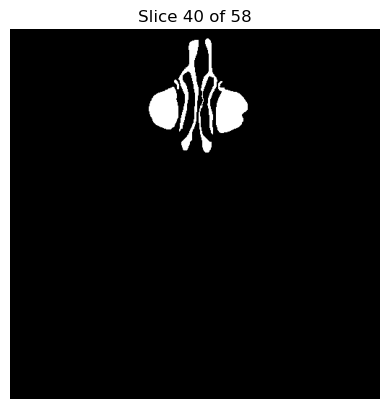

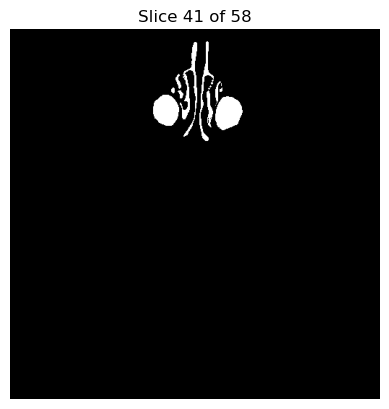

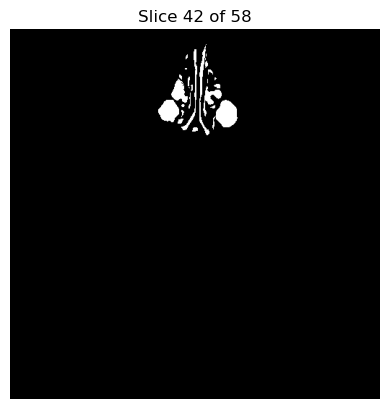

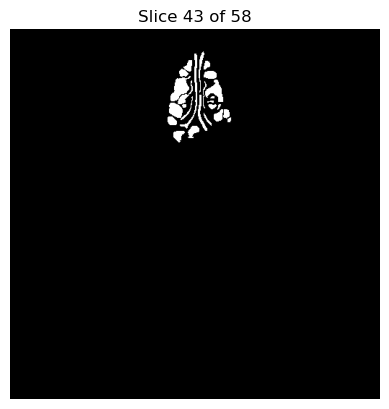

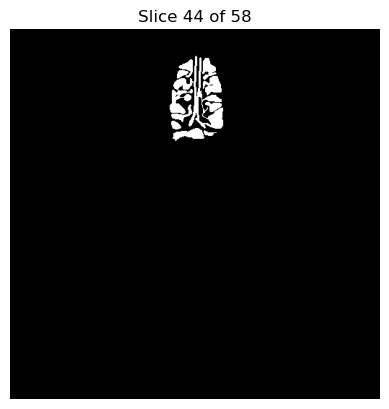

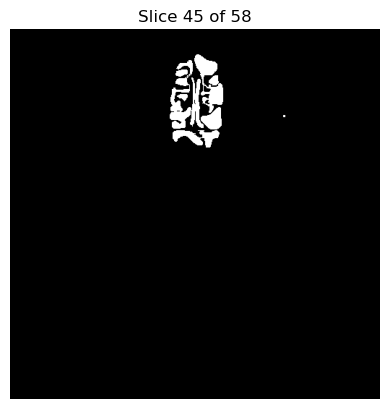

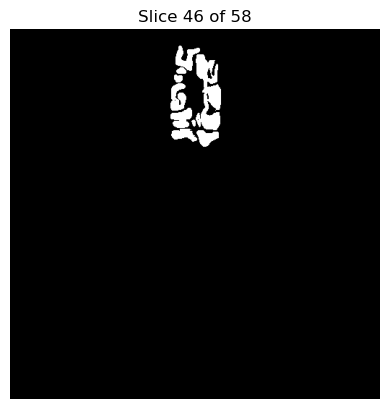

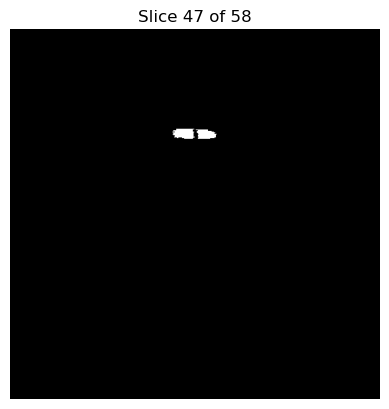

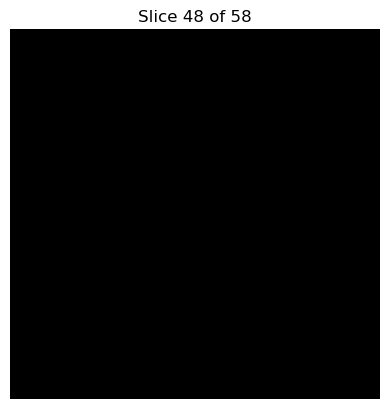

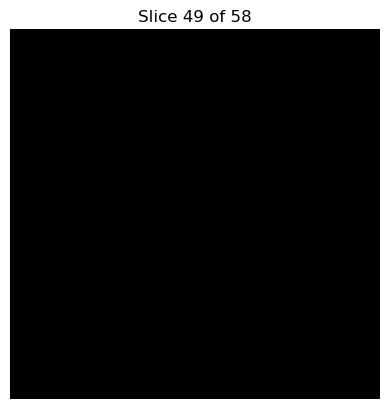

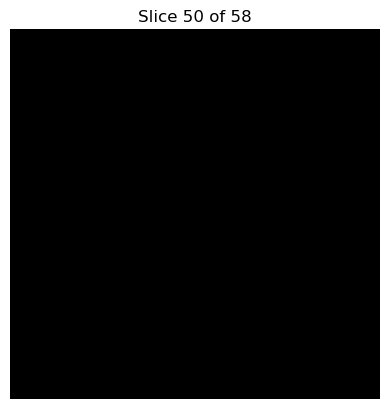

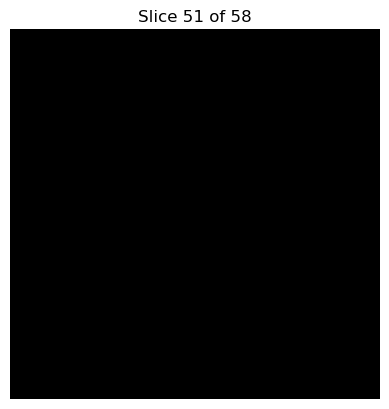

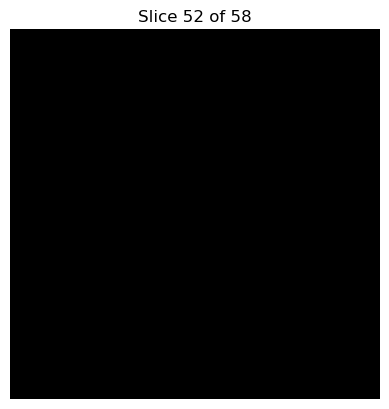

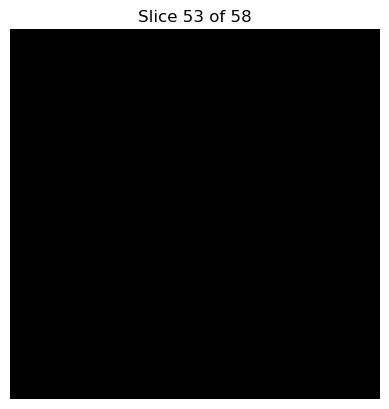

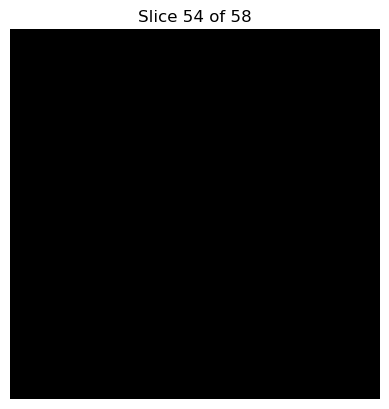

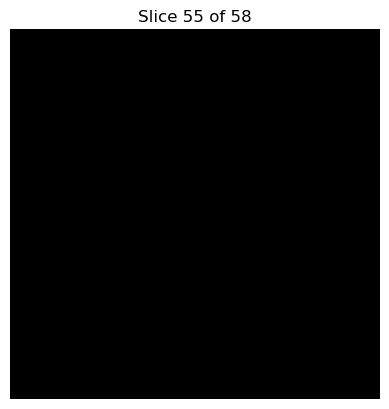

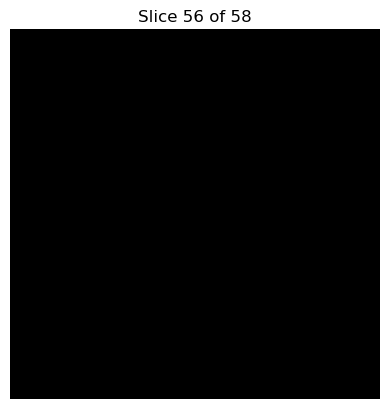

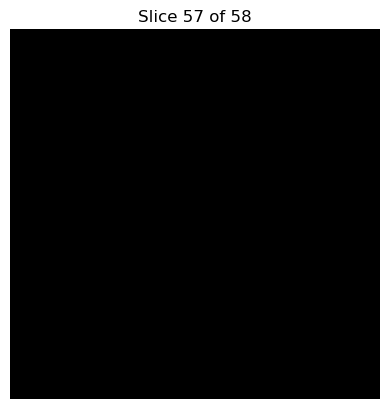

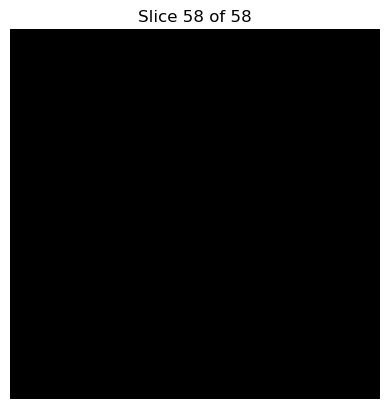

In [4]:

# Path to the NRRD file
nrrd_file_path = r'../Khoss_Daten_for_Rawan/thesis/dataset/labels_raw/label_1/Segmentation.seg.nrrd'

# Load the NRRD image
image = sitk.ReadImage(nrrd_file_path)

# Convert the image to a NumPy array
image_array = sitk.GetArrayFromImage(image)

# Loop through all slices and display them
for slice_index in range(image_array.shape[0]):
    plt.imshow(image_array[slice_index], cmap='gray')
    plt.title(f'Slice {slice_index + 1} of {image_array.shape[0]}')
    plt.axis('off')
    plt.show()


#### We see that we have 58 slices and their segmentations.

### Data Augmentation

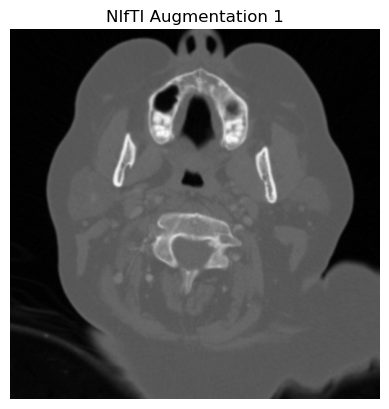

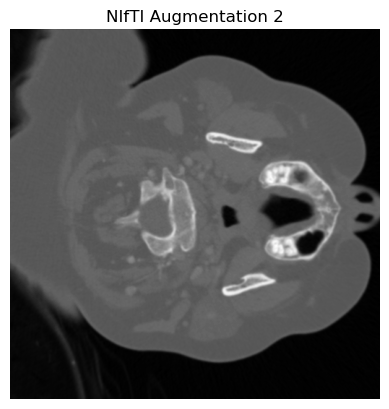

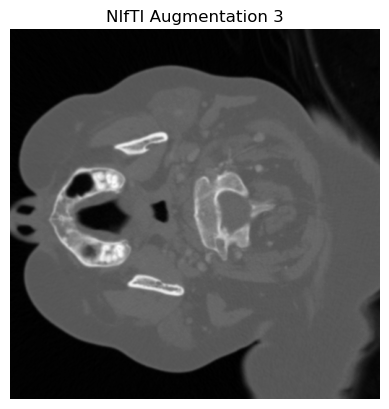

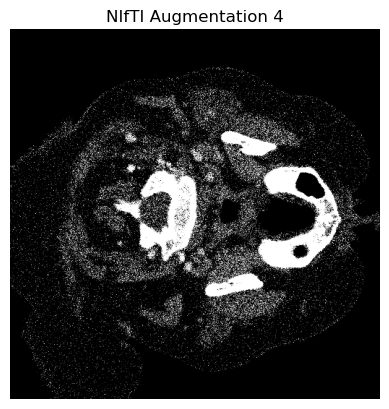

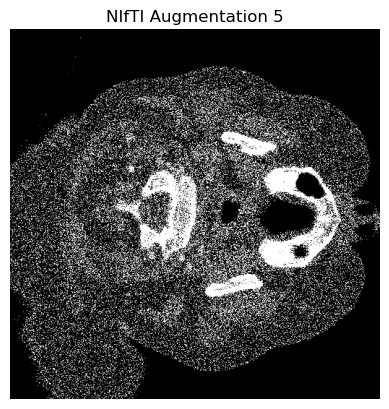

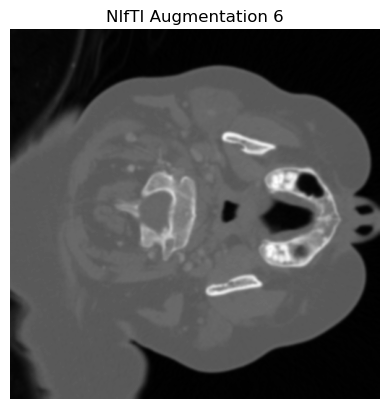

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import nibabel as nib

# Load the NIfTI image
file_path = '../Khoss_Daten_for_Rawan/thesis/dataset/recs_raw/rec_1/8.nii.gz'
nifti_img = nib.load(file_path)
img_data = nifti_img.get_fdata()

# Extract path information
base_dir = os.path.dirname(file_path)
file_name = os.path.basename(file_path).split('.')[0]  # "8"
output_dir = os.path.join(base_dir, file_name)
os.makedirs(output_dir, exist_ok=True)

# Extract the middle slice (z-axis)
slice_index = img_data.shape[2] // 2
nifti_slice = img_data[:, :, slice_index]

# Define augmentation functions
def augment_images(image):
    augmented_images = []

    # 1. Rotate 90 degrees counterclockwise
    rotated_image = np.rot90(image)
    augmented_images.append(rotated_image)

    # 2. Flip horizontally (along the X-axis)
    flipped_x_image = np.flipud(image)
    augmented_images.append(flipped_x_image)

    # 3. Flip vertically (along the Y-axis)
    flipped_y_image = np.fliplr(image)
    augmented_images.append(flipped_y_image)

    # 4. Add Gaussian noise (k = 0.2 and k = 0.5)
    sigma = np.std(image)
    for k in [0.2, 0.5]:
        noise = np.random.normal(0, sigma * k, image.shape)
        noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
        augmented_images.append(noisy_image)

    # 5. Apply Gaussian blur with a kernel size of 5x5
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    augmented_images.append(blurred_image)

    return augmented_images

# Apply augmentations
nifti_augmented_images = augment_images(nifti_slice)

# Display and save results
for i, aug_img in enumerate(nifti_augmented_images):
    plt.imshow(aug_img, cmap='gray')
    plt.title(f'NIfTI Augmentation {i+1}')
    plt.axis('off')
    plt.show()
    cv2.imwrite(f"{output_dir}/nifti_augmented_{i}.png", aug_img.astype(np.uint8))


### Normalize the image

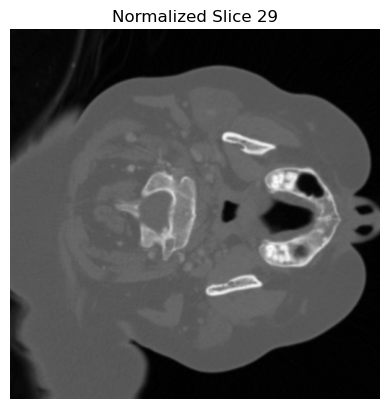

In [6]:
# Path to the NIfTI file
file_path = '../Khoss_Daten_for_Rawan/thesis/dataset/recs_raw/rec_1/8.nii.gz'

# Load the NIfTI image
nifti_img = nib.load(file_path)
img_data = nifti_img.get_fdata()

# Normalize the image to the range [0, 1]
normalized_img = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))

# Extract and display a middle slice
slice_index = normalized_img.shape[2] // 2
plt.imshow(normalized_img[:, :, slice_index], cmap='gray')
plt.title(f'Normalized Slice {slice_index}')
plt.axis('off')
plt.show()


### Check if the image was correctly normalized.

Minimum value: 0.0
Maximum value: 1.0


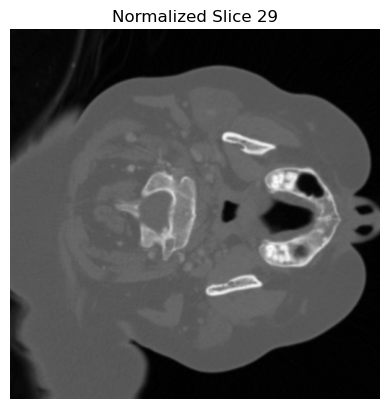

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Path to the NIfTI file
file_path = '../Khoss_Daten_for_Rawan/thesis/dataset/recs_raw/rec_1/8.nii.gz'

# Load the NIfTI image
nifti_img = nib.load(file_path)
img_data = nifti_img.get_fdata()

# Normalize the image to the range [0, 1]
normalized_img = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))

# Check if the image is normalized
min_value = np.min(normalized_img)
max_value = np.max(normalized_img)
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

# Extract and display a middle slice
slice_index = normalized_img.shape[2] // 2
plt.imshow(normalized_img[:, :, slice_index], cmap='gray')
plt.title(f'Normalized Slice {slice_index}')
plt.axis('off')
plt.show()
